In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

Dataset Preview:
   temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                            

C:\Users\hp\AppData\Local\Temp\ipykernel_5536\1707749495.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


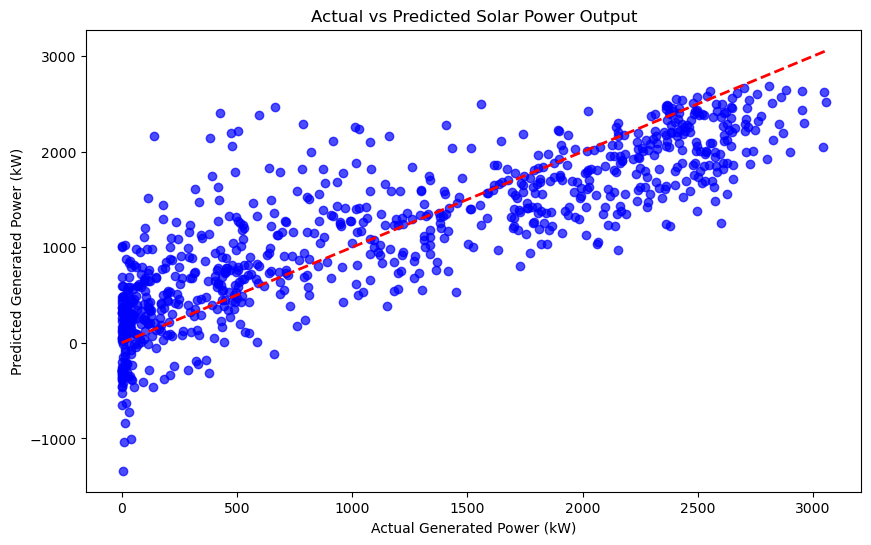


Feature Importance:
                              Feature  Coefficient
4                 snowfall_amount_sfc   594.561202
10          wind_speed_10_m_above_gnd    16.626789
2         mean_sea_level_pressure_MSL    16.215824
12          wind_speed_80_m_above_gnd     9.138315
9   shortwave_radiation_backwards_sfc     1.236998
11      wind_direction_10_m_above_gnd     0.301610
13      wind_direction_80_m_above_gnd     0.159423
15              wind_direction_900_mb    -0.262991
7      medium_cloud_cover_mid_cld_lay    -1.148263
6       high_cloud_cover_high_cld_lay    -1.236020
8         low_cloud_cover_low_cld_lay    -1.365659
5               total_cloud_cover_sfc    -1.468979
16           wind_gust_10_m_above_gnd    -3.071205
3             total_precipitation_sfc    -3.887873
1     relative_humidity_2_m_above_gnd    -4.264223
19                            azimuth    -6.183973
18                             zenith    -7.730780
0           temperature_2_m_above_gnd    -9.235794
17        

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
data_path = 'D:\\TULSI\\internships\\skills4future\\solar.csv'  
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Data Preprocessing
# Separate features and target variable
X = data.drop(columns=['generated_power_kw'])
y = data['generated_power_kw']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, as linear regression handles scaling internally)
# Uncomment if needed
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Generated Power (kW)')
plt.ylabel('Predicted Generated Power (kW)')
plt.title('Actual vs Predicted Solar Power Output')
plt.show()

# Feature Importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(coefficients)

# Save the model (optional)
import joblib
joblib.dump(model, 'solar_power_model.pkl')

# Example Prediction
example_input = X_test.iloc[0].values.reshape(1, -1)
example_prediction = model.predict(example_input)
print("\nExample Input:")
print(X_test.iloc[0])
print(f"Predicted Solar Power Output: {example_prediction[0]:.2f} kW")